In [19]:
%matplotlib inline
    
from numpy import nan
import pandas as pd
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt
import alphalens

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [20]:
#
# build price
#
price_index = pd.Index(date_range(start='2015-1-10', end='2015-2-28'))
price_index.name = 'date_1'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = pd.Index(date_range(start='2015-1-15', end='2015-2-13'))
factor_index.name = 'date_2'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) .stack()

factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

In [21]:
factor.index.levels

FrozenList([[2015-01-15 00:00:00, 2015-01-16 00:00:00, 2015-01-17 00:00:00, 2015-01-18 00:00:00, 2015-01-19 00:00:00, 2015-01-20 00:00:00, 2015-01-21 00:00:00, 2015-01-22 00:00:00, 2015-01-23 00:00:00, 2015-01-24 00:00:00, 2015-01-25 00:00:00, 2015-01-26 00:00:00, 2015-01-27 00:00:00, 2015-01-28 00:00:00, 2015-01-29 00:00:00, 2015-01-30 00:00:00, 2015-01-31 00:00:00, 2015-02-01 00:00:00, 2015-02-02 00:00:00, 2015-02-03 00:00:00, 2015-02-04 00:00:00, 2015-02-05 00:00:00, 2015-02-06 00:00:00, 2015-02-07 00:00:00, 2015-02-08 00:00:00, 2015-02-09 00:00:00, 2015-02-10 00:00:00, 2015-02-11 00:00:00, 2015-02-12 00:00:00, 2015-02-13 00:00:00], ['A', 'B', 'C', 'D', 'E', 'F']])

In [22]:
prices.head()

,A,B,C,D,E,F
date_1,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [23]:
DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]])

,A,B,C,D,E,F
date_2,,,,,,
2015-01-15,3,4.0,2.0,1,NaN,NaN
2015-01-16,3,NaN,NaN,1,4.0,2.0
2015-01-17,3,4.0,2.0,1,NaN,NaN
2015-01-18,3,4.0,2.0,1,NaN,NaN
2015-01-19,3,4.0,2.0,1,NaN,NaN
2015-01-20,3,4.0,2.0,1,NaN,NaN
2015-01-21,3,NaN,NaN,1,4.0,2.0
2015-01-22,3,NaN,NaN,1,4.0,2.0
2015-01-23,3,4.0,2.0,1,NaN,NaN


In [24]:
type(factor.iloc[0])

numpy.float64

In [25]:
factor.head(10)

date_2       
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
dtype: float64

In [26]:
factor.shape

(120,)

<AxesSubplot:xlabel='date_1'>

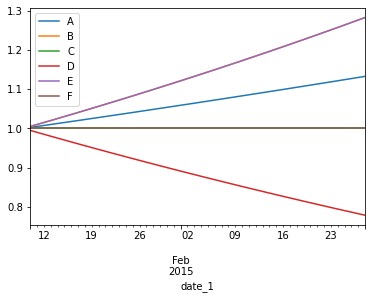

In [27]:
prices.plot()

In [28]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [29]:
factor_data.head(10)

1D        3D  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4

Quantiles Statistics


/opt/anaconda3/lib/python3.9/site-packages/alphalens/plotting.py:183: FutureWarning: ['group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  quantile_stats = factor_data.groupby('factor_quantile') \
/opt/anaconda3/lib/python3.9/site-packages/alphalens/plotting.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_stats['count %'] = quantile_stats['count'] \


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


/opt/anaconda3/lib/python3.9/site-packages/alphalens/plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


,1D,3D
Ann. alpha,0.762,0.766
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),50.000,50.000
Mean Period Wise Return Bottom Quantile (bps),-50.000,-50.000
Mean Period Wise Spread (bps),100.000,100.000


<Figure size 432x288 with 0 Axes>

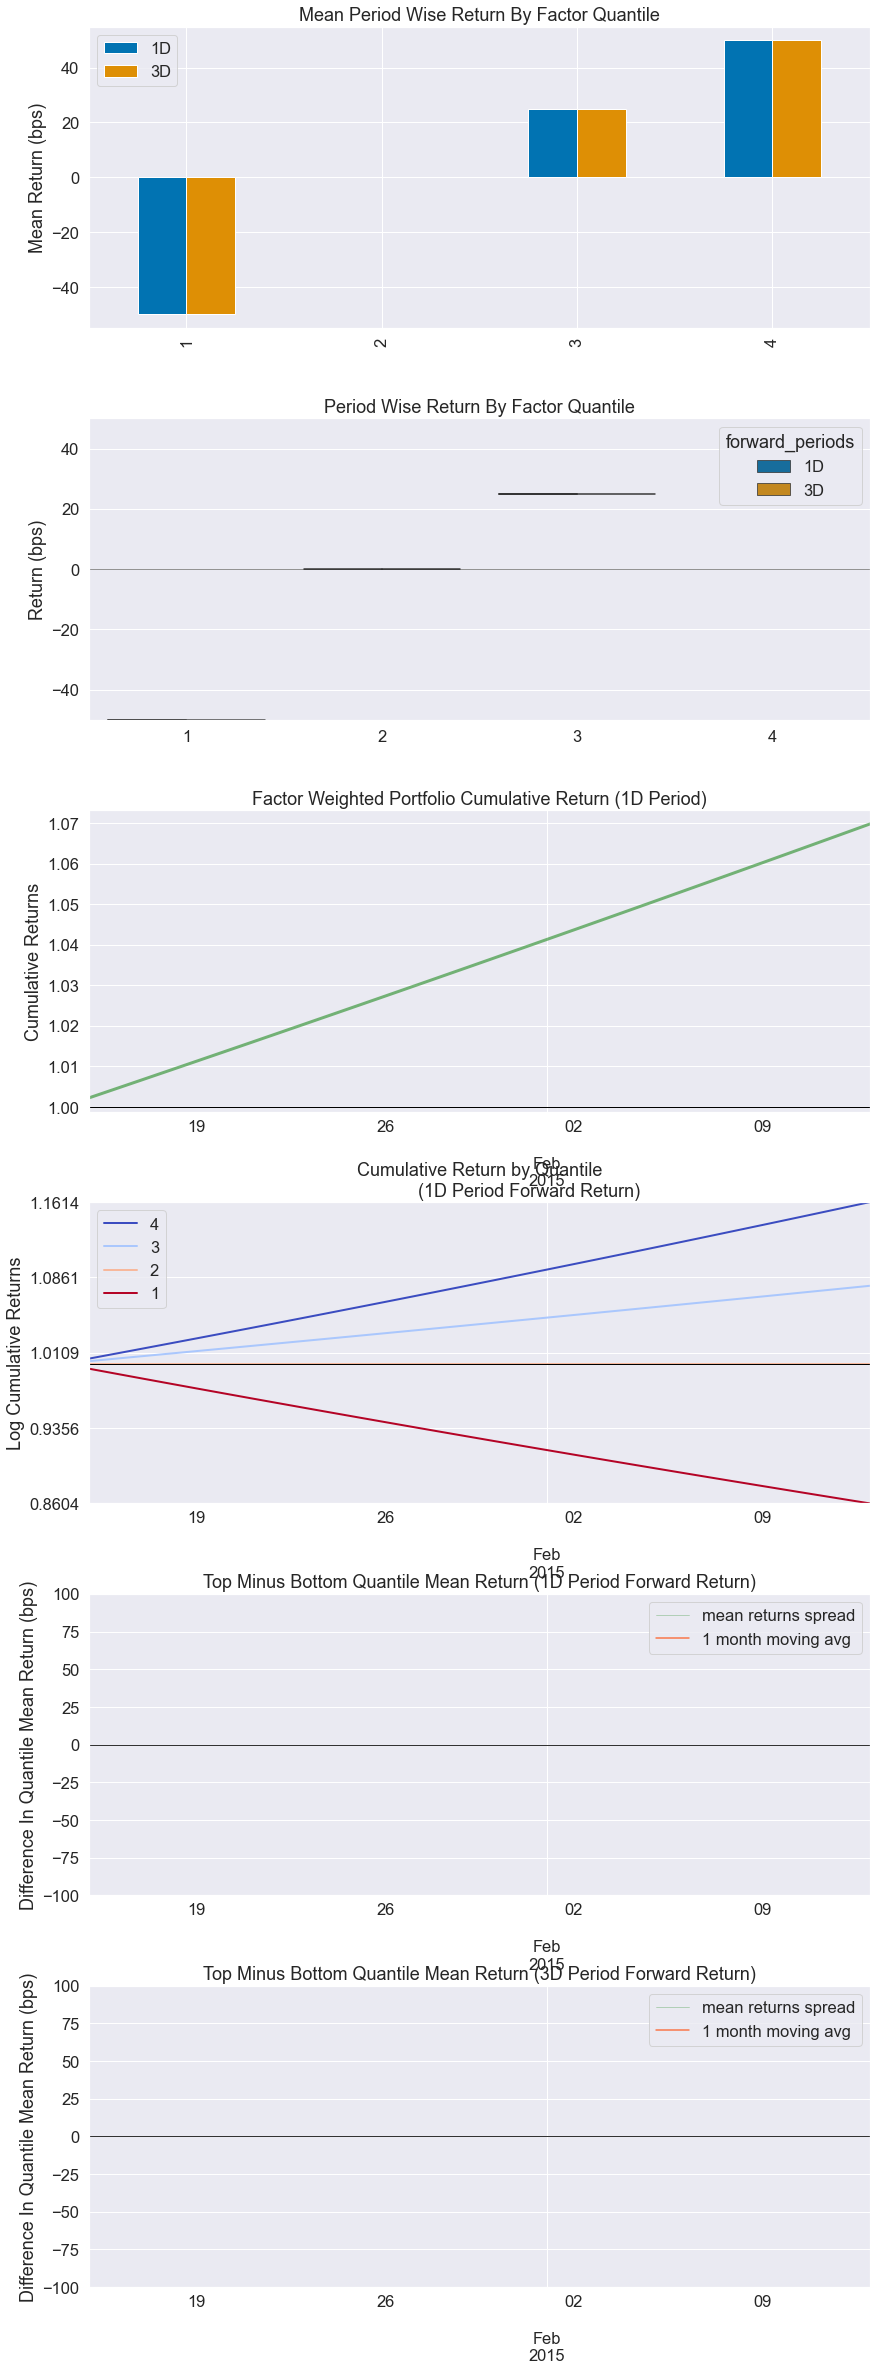

Information Analysis


,1D,3D
IC Mean,1.0,1.0
IC Std.,0.0,0.0
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.0,0.0
IC Skew,0.0,0.0
IC Kurtosis,-3.0,-3.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py

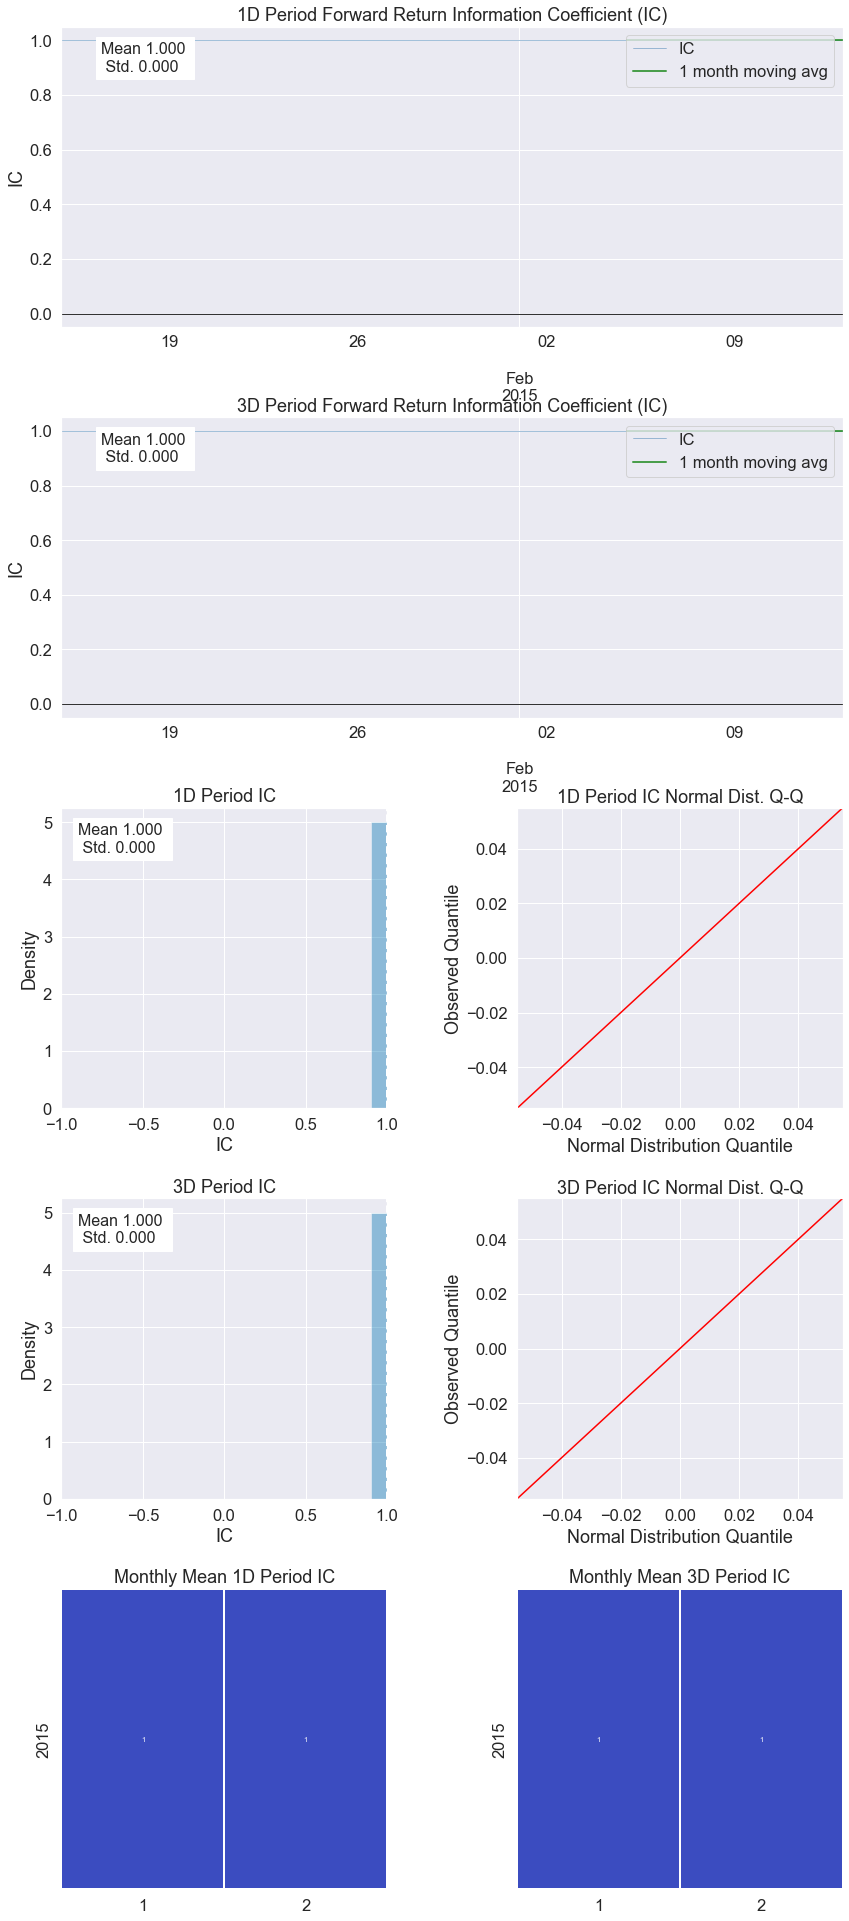

Turnover Analysis


/opt/anaconda3/lib/python3.9/site-packages/alphalens/utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


,1D,3D
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1D,3D
Mean Factor Rank Autocorrelation,1.0,1.0


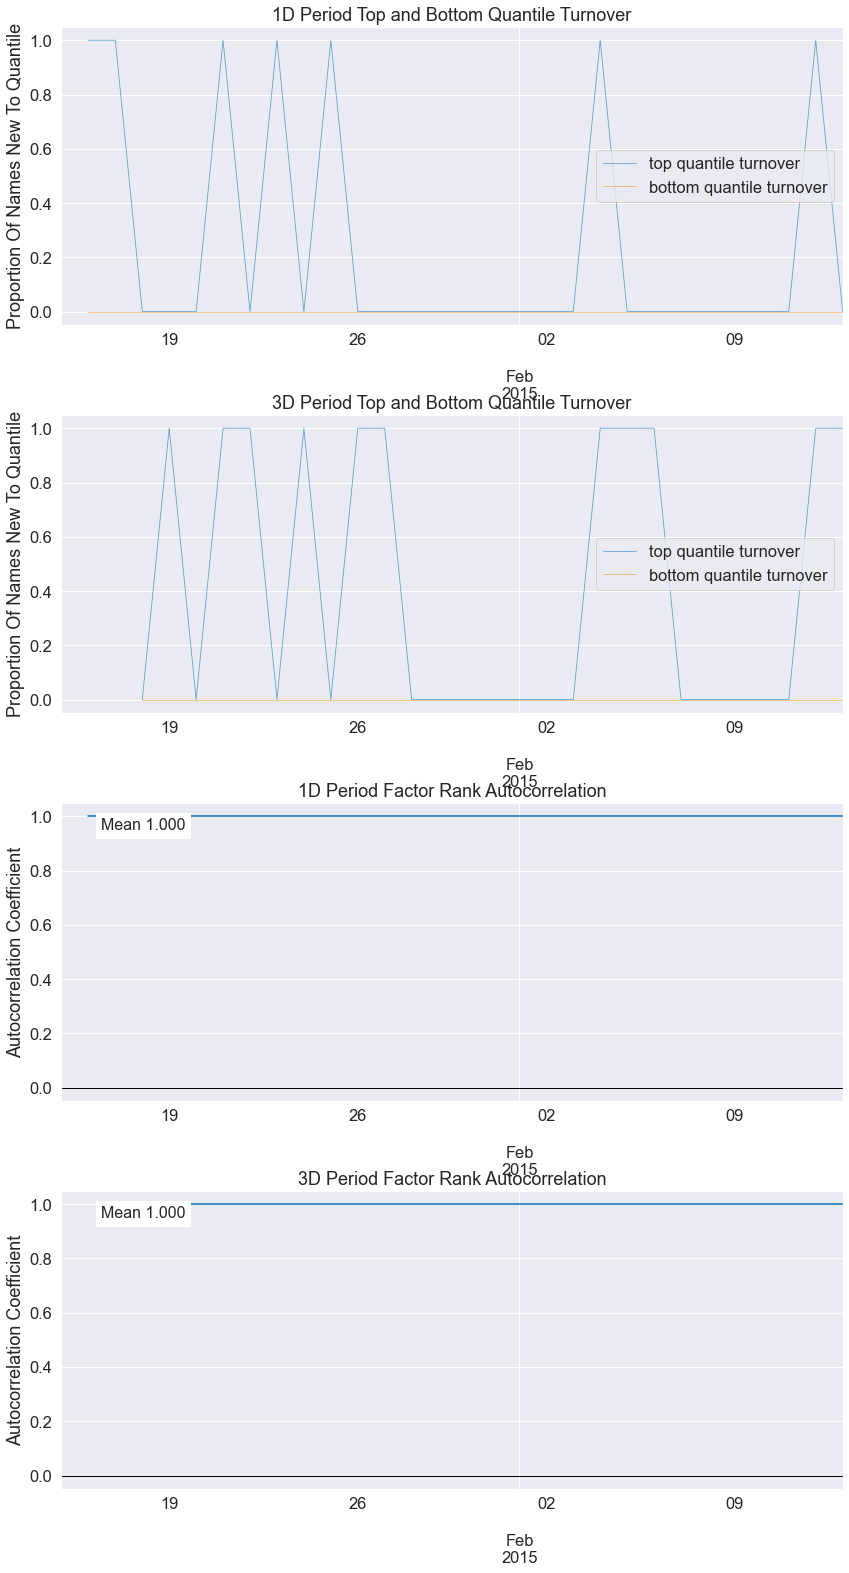

/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:end

/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:end

/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/anaconda3/lib/python3.9/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:end

<Figure size 432x288 with 0 Axes>

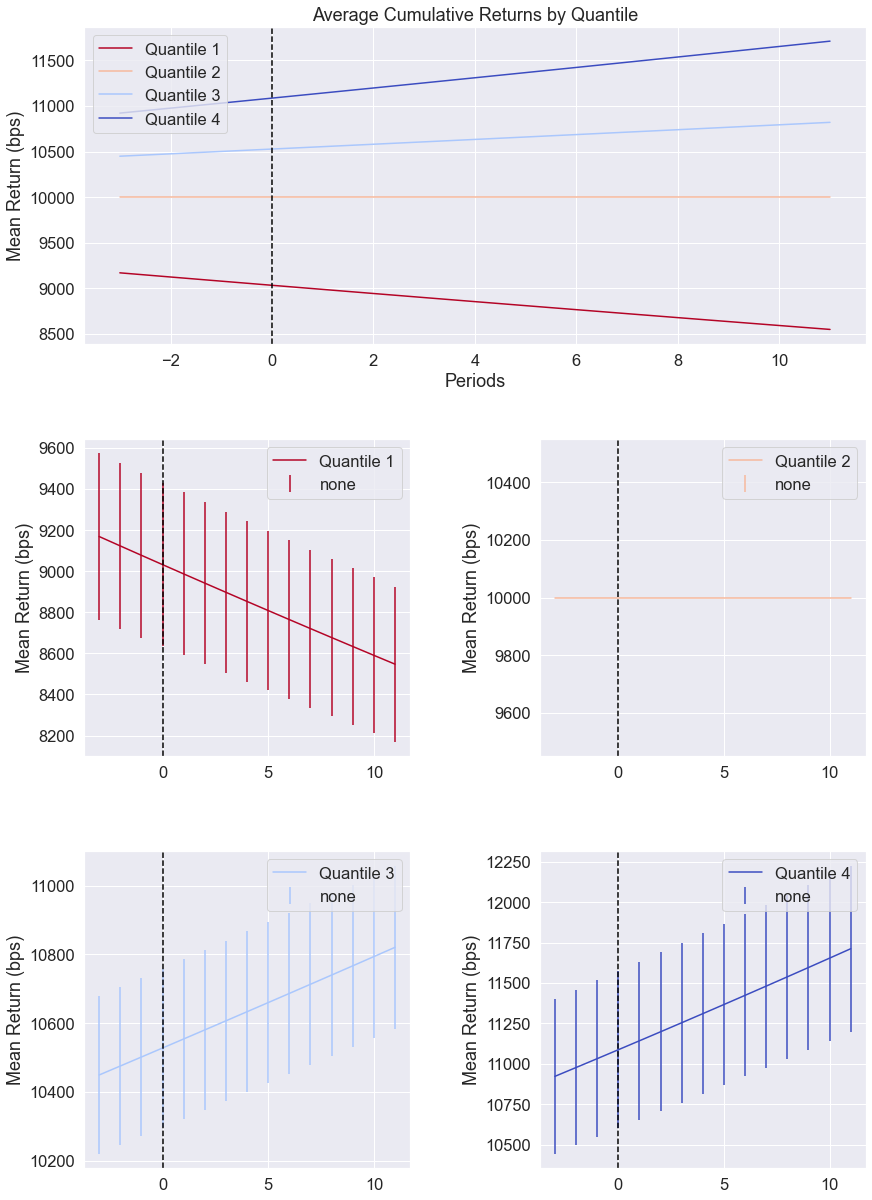

In [30]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

In [31]:
print(alphalens.tears.__file__)

/opt/anaconda3/lib/python3.9/site-packages/alphalens/tears.py


In [2]:
# pip install alphalens

In [3]:
import pandas as pd
pd.__version__

'1.4.1'

In [1]:
import re
xx = "guru99,education is fun"
r1 = re.findall(r"^\w+",xx)
print(r1)

['guru99']


In [2]:
import re
xx = "guru99,education is fun"
r1 = re.findall(r"^\w+", xx)
print((re.split(r'\s','we are splitting the words')))
print((re.split(r's','split the words')))

['we', 'are', 'splitting', 'the', 'words']
['', 'plit the word', '']


In [19]:
import numpy as np

a = np.array([ True, False, False,  True, False], dtype=bool)
b = np.array([False,  True,  True,  True,  False], dtype=bool)

np.logical_or(a, b)

array([ True,  True,  True,  True, False])

In [20]:
np.unique(np.array(["ad", 'as', 'ad']))

array(['ad', 'as'], dtype='<U2')

In [25]:
price_index = pd.Index(date_range(start='2005-6', end='2021-8'))

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4],
                  [np.nan, np.nan, np.nan, np.nan]],
                  columns=list("ABCD"))

In [8]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0
4,NaN,NaN,NaN,NaN


In [9]:
df.fillna(method="ffill")

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0
4,3.0,3.0,NaN,4.0
